In [9]:
from keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()
import pandas as pd

In [6]:
print("訓練資料的維度")
print(x_train.shape)

print("============")
print("測試資料的維度")
print(x_test.shape)

訓練資料的維度
(60000, 28, 28)
測試資料的維度
(10000, 28, 28)


答案是
5


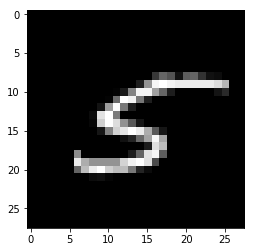

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
# random.randint(0, x_train.shape[0] - 1)
c = random.randint(0, 59999)
print("答案是")
print(y_train[c])
plt.imshow(x_train[c], cmap="gray")



In [10]:
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,253,219,29,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,15,...,252,253,196,7,0,0,0,0,0,0
9,0,0,0,0,0,0,0,6,66,237,...,232,253,252,29,0,0,0,0,0,0


In [23]:
# 資料整理
# 常態化 normalize 配合 一開始隨機的 weight
# 記得要攤開 -> 28 * 28
x_train_shape = x_train.reshape(60000,784) / 255
x_test_shape = x_test.reshape(10000,784) / 255

# y 必須要 one-hot encoding 3 -> [0,0,0,0,0,1,0,0,0,0
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# show one
y_train_cat[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [28]:
from keras.models import Sequential
from keras.layers import Dense
# 創建 Sequential model
mlp = Sequential()
# 第一中間層 要告訴 model 有多少 input (input_dim)
mlp.add(Dense(128, input_dim=784, activation="relu"))
# 最後一層
mlp.add(Dense(10, activation="softmax"))


mlp.summary()
# param 為 1290 ?
# 128 input  10 output -> 1280個
# 最後 10 為 bias 偏移
# 同理 784 input 128 個 激活函式
# 784 * 128 + 128 = 100480




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 確定模型訓練方式
# optimizer 讓 點能衝過局部低點 到達全局低點
# 可以無腦選 adam 
# 回歸 : loss -> mse , 
# 二元分類(output:1) : binary_crossentrophy
# 多元分類(output>1) : categorical_crossentropy
mlp.compile(optimizer="adam", 
            loss="categorical_crossentropy",
           metrics=["accuracy"])


In [30]:
# batch 看幾張圖 做一次梯度下降
# batch_size -> 平均效果 省時效果
# epochs: 整個資料集 看幾次
# epochs 10 batch 200 -> 60000 * 10 / 200 = 3000次梯度下降
# verbose = log 0:silent 1:progress bar 2:每次印一行
mlp.fit(x_train_shape, 
        y_train_cat, 
        batch_size=200,
       epochs=15,
       validation_split=0.1,
       verbose=2)


# 要看 val_loss & val_acc
# 切割後的訓練集中 每次拿 90% 再去找 剩下的答案
# 注意 overfitting
# 重新訓練 重新創建模型


Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 1s - loss: 0.4394 - acc: 0.8797 - val_loss: 0.1977 - val_acc: 0.9472
Epoch 2/15
 - 1s - loss: 0.2083 - acc: 0.9405 - val_loss: 0.1448 - val_acc: 0.9607
Epoch 3/15
 - 1s - loss: 0.1559 - acc: 0.9557 - val_loss: 0.1182 - val_acc: 0.9695
Epoch 4/15
 - 1s - loss: 0.1238 - acc: 0.9646 - val_loss: 0.1095 - val_acc: 0.9702
Epoch 5/15
 - 1s - loss: 0.1018 - acc: 0.9710 - val_loss: 0.0957 - val_acc: 0.9725
Epoch 6/15
 - 1s - loss: 0.0852 - acc: 0.9754 - val_loss: 0.0875 - val_acc: 0.9752
Epoch 7/15
 - 1s - loss: 0.0728 - acc: 0.9793 - val_loss: 0.0843 - val_acc: 0.9762
Epoch 8/15
 - 1s - loss: 0.0633 - acc: 0.9823 - val_loss: 0.0804 - val_acc: 0.9763
Epoch 9/15
 - 1s - loss: 0.0542 - acc: 0.9846 - val_loss: 0.0766 - val_acc: 0.9778
Epoch 10/15
 - 1s - loss: 0.0469 - acc: 0.9874 - val_loss: 0.0792 - val_acc: 0.9765
Epoch 11/15
 - 1s - loss: 0.0411 - acc: 0.9889 - val_loss: 0.0748 - val_acc: 0.9770
Epoch 12/15
 - 1s - loss: 0.0368 - a

In [31]:
mlp.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 18us/step


[0.06977536444398574, 0.978]

In [33]:
# 看 ACC
from sklearn.metrics import confusion_matrix
# predict_classes
ac = confusion_matrix(y_test,
                 mlp.predict_classes(x_test_shape))

pd.DataFrame(ac)

,0,1,2,3,4,5,6,7,8,9
0,967,0,0,1,1,2,3,2,2,2
1,0,1125,3,0,0,1,3,0,3,0
2,4,2,1011,0,1,0,3,7,4,0
3,1,1,7,979,0,7,1,4,6,4
4,0,0,2,0,966,0,5,2,0,7
5,2,0,0,6,1,872,6,2,1,2
6,6,2,1,0,2,4,943,0,0,0
7,1,6,7,3,0,0,0,1005,1,5
8,8,0,3,5,5,6,5,5,933,4
9,2,4,0,5,8,4,1,5,1,979


要判斷的?7.png
預測是
[7]


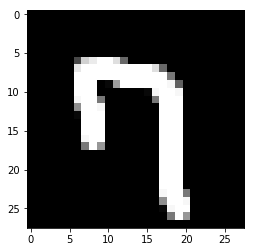

In [50]:
# pillow
from PIL import Image
import numpy as np
fn = input("要判斷的?")

myImg = np.array(Image.open(fn).resize((28,28)).convert("L"))

x_pre = np.array(myImg).reshape(1,784) / 288
print("預測是")
print(mlp.predict_classes(x_pre))

plt.imshow(myImg, cmap="gray")